In [1]:
!pip install pymysql
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from AnalyzerFolder import Analyzer

In [20]:
mk = Analyzer.MarketDB()
stock = ['동양에스텍', '삼성전기', 'NAVER', '카카오']
df = pd.DataFrame()
for i in stock:
    df[i] = mk.get_daily_price(i, '2017-07-18', '2021-08-04')['close']

df

,동양에스텍,삼성전기,NAVER,카카오
date,,,,
2017-07-18,3400,105500,830000,103500
2017-07-19,3400,102000,835000,105000
2017-07-20,3420,102000,835000,105000
2017-07-21,3425,106000,839000,108000
2017-07-24,3445,106500,833000,109000
...,...,...,...,...
2021-07-29,2175,2175,2175,2175
2021-07-30,2160,2160,2160,2160
2021-08-02,2155,2155,2155,2155


In [21]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

annual_cov

,동양에스텍,삼성전기,NAVER,카카오
동양에스텍,0.398089,0.156182,0.132635,0.141465
삼성전기,0.156182,0.410696,0.272009,0.290303
NAVER,0.132635,0.272009,0.528369,0.307075
카카오,0.141465,0.290303,0.307075,0.537263


In [22]:
port_ret = []      # 종목 비중 다르게 해 Portfolio 20,000개 생성하기 위한 단계
port_risk = []     # 포트 수익률, 리스크, 비중 저장할 리스트 생성
port_weights = []  #

In [23]:
for _ in range(20000): # 몬테카를로 시뮬레이션 이용해 Portfolio 20,000개 생성
    weights = np.random.random(len(stock))  # stock 개수의 랜덤 숫자로 구성된 배열 생성
    weights /= np.sum(weights)  # 비중의 합이 1이 되도록 조정

    returns = np.dot(weights, annual_ret)  # np.dot 사용해 [(종목별 비중 배열) * (종목별 연간 수익률) = Portfolio 전체 returns] 구하기
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # sqrt((공분산*비중) * 비중의 전치행렬) = Portfolio 전체 Risk 구하기

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}

In [24]:
for i, s in enumerate(stock):  # i 값은 0, 1, 2, 3 순으로, s값은 '삼성전자', 'SK하이닉스', 'NAVER', '카카오' 순으로
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stock]]
df

,Returns,Risk,동양에스텍,삼성전기,NAVER,카카오
0,0.000217,0.530587,0.329321,0.303576,0.011296,0.355807
1,0.000110,0.547667,0.223189,0.184544,0.177445,0.414822
2,-0.000211,0.601460,0.090870,0.082255,0.555279,0.271597
3,-0.000165,0.569191,0.121507,0.214508,0.441992,0.221993
4,0.000223,0.551066,0.271294,0.183061,0.062901,0.482743
...,...,...,...,...,...,...
19995,0.000134,0.510117,0.452791,0.180131,0.165338,0.201739
19996,0.000150,0.522372,0.357642,0.154952,0.157416,0.329990
19997,0.000064,0.545268,0.188599,0.290512,0.169542,0.351347
19998,-0.000010,0.513374,0.408100,0.360898,0.220615,0.010387


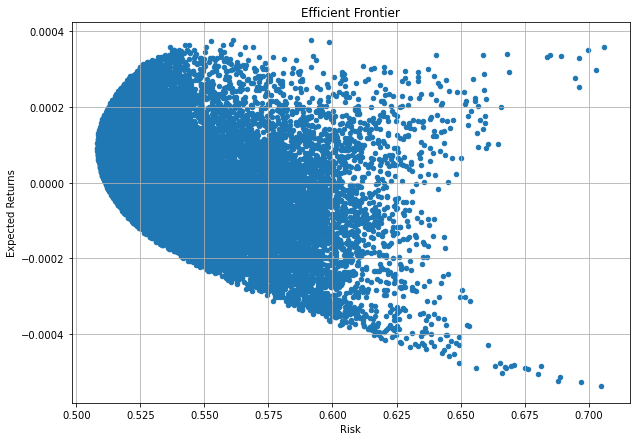

In [25]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [26]:
df['Risk'].min()

0.5081219648305655

In [27]:
df['Risk'].max()

0.7061148760274328

In [28]:
df['Returns'].max()

0.00037809383480337316